<a href="https://colab.research.google.com/github/shaquillo/student_department_counselling/blob/main/student_department_counselling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# *Student department counselling*
### Links: 
- [Github](git@github.com:shaquillo/student_department_counselling.git)
- [python-widedeep](https://pytorch-widedeep.readthedocs.io/en/latest/index.html)
---

# Import of Libraries

In [ ]:
!pip install pytorch-widedeep --quiet

     |████████████████████████████████| 149 kB 5.2 MB/s 
     |████████████████████████████████| 282 kB 18.9 MB/s 
     |████████████████████████████████| 15.7 MB 55 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

import torch
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep import Trainer 
from pytorch_widedeep.metrics import Accuracy, F1Score
from pytorch_widedeep.models import TabMlp, WideDeep, TabResnet, SAINT, FTTransformer

# Loading Data

In [ ]:
data_link = '/content/drive/MyDrive/datasets/mlpc/school/final_data14.csv'

In [ ]:
data = pd.read_csv(data_link)

In [ ]:
data.head(20)

Unnamed: 0  Anonymat  INF212  HUM220  ...  PHYS112  LAN121  HUM210  department
0            1       298    1.80   7.850  ...    15.89    9.00    7.20        GIND
1            2       173    5.00   7.950  ...    11.18   10.00    9.60        GIND
2            3       195    2.00   8.175  ...     5.10    6.25   11.05          GM
3            4       218    9.80   6.850  ...     6.41    7.80    7.50        GIND
4            5       240   11.18  12.400  ...     6.72   11.00   12.20          GI
5            6       252    4.20   6.500  ...     6.22   10.25   11.90        GIND
6            7       270    6.20  11.500  ...     8.51    8.60   12.50          GI
7            8       286   13.00  11.175  ...     8.82    9.65   12.90          GI
8           10       290    1.90   4.900  ...     5.55    5.40    5.80        GIND
9           11       182    1.80  10.475  ...    12.57    9.05   11.80        GELE
10          12       185    5.30  11.450  ...     8.15    6.25   13.55          GC
11          13       197   14.40   8.675  ...     7.84    9.45   11.45          GI
12          14       199    4.00  11.300  ...     6.72   12.05    9.60        GELE
13          15       203    0.45   7.325  ...    10.14   12.15   11.15          GM
14          22       231    4.20  10.250  ...     5.50    9.60    7.10          GM
15          24       242    6.20   7.000  ...     8.03   10.95    8.70        GELE
16          26       245    6.80  13.375  ...     4.75   12.30   10.55          GM
17          27       246    2.60   9.650  ...    11.96   12.50    8.95        GELE
18          29       253    2.40   9.625  ...     7.30    9.65   11.95        GELE
19          30       255    7.60   9.850  ...    10.82    9.10   10.30          GC

[20 rows x 35 columns]

In [ ]:
## Removing columns of index, id, sports and language subjects

data.drop(columns=['Unnamed: 0', 'Anonymat', 'COS211', 'HUM220', 'COS221', 'LAN121', 'HUM210'], inplace=True)

# Data Exploration

In [ ]:
data.describe()

INF212      MAT217      INF222  ...      DES124     PHYS121     PHYS112
count  141.000000  141.000000  141.000000  ...  141.000000  141.000000  141.000000
mean     7.947021    9.315248   11.324113  ...   11.768085   11.437447   10.036312
std      4.165298    5.335166    3.765514  ...    3.292553    3.597670    3.393441
min      0.450000    0.000000    2.650000  ...    4.950000    3.300000    4.100000
25%      4.550000    4.400000    8.350000  ...    8.800000    8.780000    7.100000
50%      7.600000    9.750000   11.350000  ...   12.300000   11.220000   10.040000
75%     10.950000   13.550000   14.250000  ...   14.400000   14.370000   12.880000
max     17.700000   18.650000   19.650000  ...   18.100000   17.970000   17.540000

[8 rows x 27 columns]

In [ ]:
data.isna().sum()

INF212        0
MAT217        0
INF222        0
PHY223        0
PHY224        0
PHY225        0
MAT226        0
MAT227        0
PHY213        0
PHY215        0
PHY214        0
MAT216        0
MAT218        0
PHY228        0
MAT_INF211    0
PHYS211       0
MATH 212      0
PHYS221       0
PHYS222       0
MAT_INF221    0
PHYS111       0
MAT_INF121    0
MAT_INF111    0
MATH 122      0
DES124        0
PHYS121       0
PHYS112       0
department    0
dtype: int64

In [ ]:
data.department.value_counts()

GI      31
GELE    28
GIND    28
GM      24
GTEL    18
GC      12
Name: department, dtype: int64

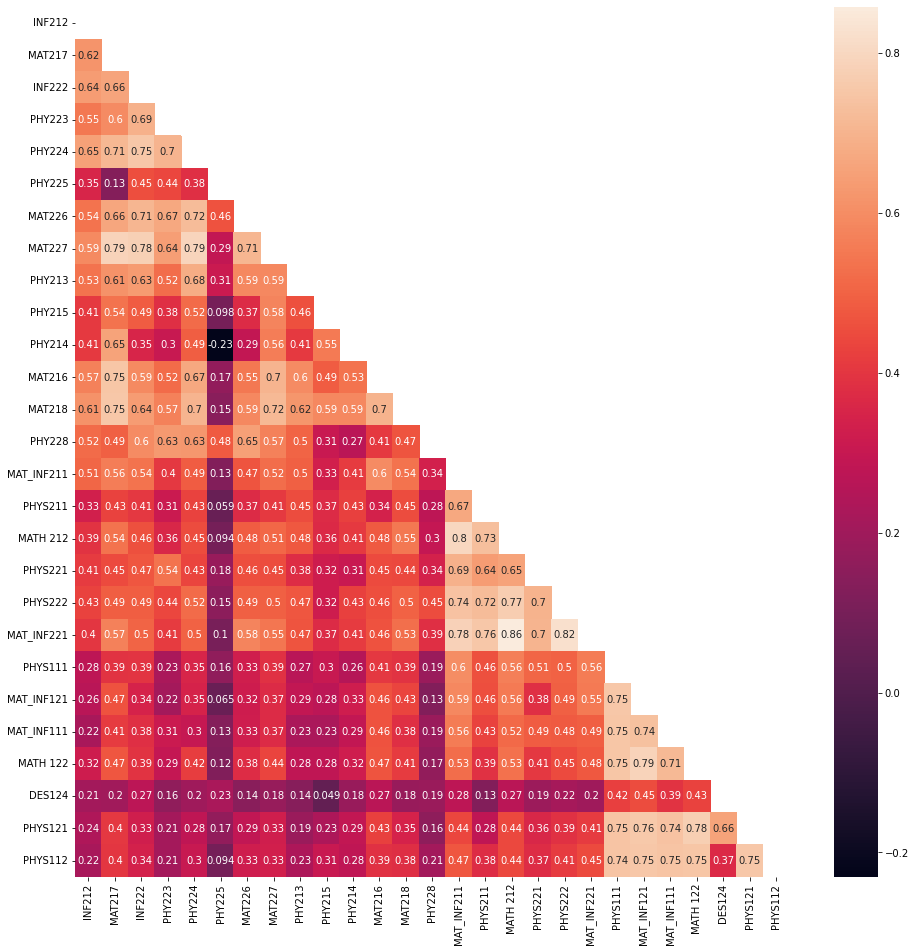

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, mask=mask, annot=True)

# Feature engineering

In [ ]:
data['av_INF'] = (data['INF212'] + data['INF222'])/2
data['av_MATH'] = (data['MAT217'] +  data['MAT226'] + data['MAT227'] + data['MAT216'] + data['MAT218'] + data['MAT_INF211'] + data['MATH 212'] + data['MAT_INF221'] + data['MAT_INF121'] + data['MAT_INF111'] + data['MATH 122']) / 11
data['av_PHY'] = (data['PHY223'] +  data['PHY224'] +  data['PHY225'] +  data['PHY213'] +  data['PHY215'] +  data['PHY214'] +  data['PHY228'] +  data['PHYS211'] +  data['PHYS221'] +  data['PHYS222'] +  data['PHYS111'] +  data['DES124'] +  data['PHYS121'] +  data['PHYS112']) / 14
data['av'] = (data['av_INF'] + data['av_MATH'] + data['av_PHY']) /3

In [30]:
data.head()

INF212  MAT217  INF222  PHY223  ...  av_INF    av_MATH     av_PHY         av
0    1.80    3.05    4.10     2.6  ...   2.950   7.995455  10.090714   7.012056
1    5.00   10.20   10.65     7.0  ...   7.825   8.758182   7.701429   8.094870
2    2.00    4.05    5.00     0.6  ...   3.500   7.670909   7.433571   6.201494
3    9.80   12.30    6.20     2.2  ...   8.000   4.069091   5.450714   5.839935
4   11.18   12.75   15.30    16.3  ...  13.240  12.290909  12.054286  12.528398

[5 rows x 32 columns]

# Model

## Data Splitting and preprocessing

In [ ]:
train_df, test_df = train_test_split(data, train_size=0.9, stratify=data['department'])
print('Num examples train-test')
print(len(train_df), len(test_df))
# train_df.to_csv('train.csv')
# test_df.to_csv('test.csv')

Num examples train-test
126 15


In [ ]:
cont_cols = list(data.columns)
cont_cols.remove('department')

target = train_df.department.values

tab_preprocessor = TabPreprocessor(continuous_cols=cont_cols)
X_tab = tab_preprocessor.fit_transform(train_df)
X_test = tab_preprocessor.transform(test_df)

y_test = test_df.department.values

In [ ]:
encoder = LabelEncoder()
target = encoder.fit_transform(target)

Result analysis function


In [37]:
def result_analysis(res, y_test):
  print('\n')
  print('result:', res)
  print('y_test:', y_test)
  print("acc:", accuracy_score(res, y_test))
  print("balanced acc:", balanced_accuracy_score(res, y_test))
  print("macro f1_score:", f1_score(res, y_test, average="macro"))
  print("micro f1_score:", f1_score(res, y_test, average="micro"))
  print("weighted f1_score:", f1_score(res, y_test, average="weighted"))

## Models

### TabMlp - Multilayer perceptron

In [ ]:
tabmlp = TabMlp(
    mlp_hidden_dims=[512, 128, 64],
    column_idx=tab_preprocessor.column_idx,
    continuous_cols=cont_cols,
    mlp_batchnorm=True,
    mlp_linear_first=False
)

model = WideDeep(deeptabular=tabmlp, pred_dim=6)

In [ ]:
tabMlp_trainer = Trainer(model, objective='multiclass', metrics=[(Accuracy), (F1Score)])
tabMlp_trainer.fit(X_tab=X_tab, target=target, n_epochs=5, batch_size=10, val_split=0.1)

valid: 100%|██████████| 2/2 [00:00<00:00, 29.13it/s, loss=1, metrics={'acc': 0.6923, 'f1': 0.6222}]


In [38]:
result_analysis(encoder.inverse_transform(tabMlp_trainer.predict(X_tab=X_test)), y_test)

predict: 100%|██████████| 2/2 [00:00<00:00, 26.99it/s]



result: ['GELE' 'GTEL' 'GIND' 'GM' 'GM' 'GI' 'GIND' 'GI' 'GI' 'GELE' 'GIND' 'GIND'
 'GM' 'GC' 'GTEL']
y_test: ['GIND' 'GTEL' 'GELE' 'GM' 'GM' 'GI' 'GELE' 'GI' 'GI' 'GELE' 'GIND' 'GIND'
 'GM' 'GC' 'GTEL']
acc: 0.8
balanced acc: 0.8333333333333334
macro f1_score: 0.8285714285714286
micro f1_score: 0.8000000000000002
weighted f1_score: 0.8057142857142857


### TabResnet - Resnet architecture

In [ ]:
tabresnet = TabResnet(
    column_idx=tab_preprocessor.column_idx,
    continuous_cols=cont_cols,
    blocks_dims=[200, 100, 100],
    mlp_hidden_dims=[100, 50],
    mlp_batchnorm=True
)
resnet_model = WideDeep(deeptabular=tabresnet, pred_dim=6)

In [ ]:
resnet_trainer = Trainer(model, objective='multiclass', metrics=[(Accuracy), (F1Score)])
resnet_trainer.fit(X_tab=X_tab, target=target, n_epochs=5, batch_size=10, val_split=0.1)

valid: 100%|██████████| 2/2 [00:00<00:00, 29.47it/s, loss=0.978, metrics={'acc': 0.8462, 'f1': 0.7167}]


In [39]:
result_analysis(encoder.inverse_transform(resnet_trainer.predict(X_tab=X_test)), y_test)

predict: 100%|██████████| 2/2 [00:00<00:00, 24.42it/s]



result: ['GELE' 'GTEL' 'GIND' 'GM' 'GM' 'GI' 'GIND' 'GI' 'GI' 'GELE' 'GIND' 'GIND'
 'GM' 'GC' 'GTEL']
y_test: ['GIND' 'GTEL' 'GELE' 'GM' 'GM' 'GI' 'GELE' 'GI' 'GI' 'GELE' 'GIND' 'GIND'
 'GM' 'GC' 'GTEL']
acc: 0.8
balanced acc: 0.8333333333333334
macro f1_score: 0.8285714285714286
micro f1_score: 0.8000000000000002
weighted f1_score: 0.8057142857142857


In [ ]:
# tabtransformer_preprocessor = TabPreprocessor(
#     embed_cols=cont_cols,
#     # continuous_cols=cont_cols,
#     for_transformer=True)

# Xt_tab = tabtransformer_preprocessor.fit_transform(train_df)
# Xt_test = tabtransformer_preprocessor.transform(test_df)

### FTTransformer
Feature tokenizer transformer

In [ ]:
ftTrans = FTTransformer(
    column_idx=tab_preprocessor.column_idx,
    continuous_cols=cont_cols,
    shared_embed=True,
    n_blocks=3,
)

ftTrans_model = WideDeep(deeptabular=ftTrans, pred_dim=6)

In [ ]:
ftTrans_trainer = Trainer(ftTrans_model, objective='multiclass', metrics=[(Accuracy), (F1Score)])
ftTrans_trainer.fit(X_tab=X_tab, target=target, n_epochs=5, batch_size=15, val_split=0.1)

valid: 100%|██████████| 1/1 [00:00<00:00, 12.49it/s, loss=0.669, metrics={'acc': 0.7692, 'f1': 0.6833}]


In [40]:
result_analysis(encoder.inverse_transform(ftTrans_trainer.predict(X_tab=X_test)), y_test)

predict:  50%|█████     | 1/2 [00:00<00:00,  9.44it/s]



result: ['GIND' 'GTEL' 'GIND' 'GM' 'GM' 'GI' 'GELE' 'GI' 'GI' 'GELE' 'GELE' 'GIND'
 'GM' 'GC' 'GTEL']
y_test: ['GIND' 'GTEL' 'GELE' 'GM' 'GM' 'GI' 'GELE' 'GI' 'GI' 'GELE' 'GIND' 'GIND'
 'GM' 'GC' 'GTEL']
acc: 0.8666666666666667
balanced acc: 0.8888888888888888
macro f1_score: 0.8888888888888888
micro f1_score: 0.8666666666666667
weighted f1_score: 0.8666666666666667


### Save model


In [32]:
tabMlp_trainer.save(path="/content/drive/MyDrive/datasets/mlpc/school_models/tabmlp", save_state_dict=True)
resnet_trainer.save(path="/content/drive/MyDrive/datasets/mlpc/school_models/tabresnet", save_state_dict=True)
ftTrans_trainer.save(path="/content/drive/MyDrive/datasets/mlpc/school_models/ftTrans", save_state_dict=True)

# Evaluation
* Selected model: FTTransformer

In [34]:
ftt = FTTransformer(
    column_idx=tab_preprocessor.column_idx,
    continuous_cols=cont_cols,
    shared_embed=True,
    n_blocks=3,
)

ftt_model = WideDeep(deeptabular=ftt, pred_dim=6)

ftt_model.load_state_dict(torch.load("/content/drive/MyDrive/datasets/mlpc/school_models/ftTrans/wd_model.pt"))

ftt_trainer = Trainer(ftt_model, objective='multiclass', metrics=[(Accuracy), (F1Score)])

In [41]:
result_analysis(encoder.inverse_transform(ftt_trainer.predict(X_tab=X_test)), y_test)

predict: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]



result: ['GIND' 'GTEL' 'GIND' 'GM' 'GM' 'GI' 'GELE' 'GI' 'GI' 'GELE' 'GELE' 'GIND'
 'GM' 'GC' 'GTEL']
y_test: ['GIND' 'GTEL' 'GELE' 'GM' 'GM' 'GI' 'GELE' 'GI' 'GI' 'GELE' 'GIND' 'GIND'
 'GM' 'GC' 'GTEL']
acc: 0.8666666666666667
balanced acc: 0.8888888888888888
macro f1_score: 0.8888888888888888
micro f1_score: 0.8666666666666667
weighted f1_score: 0.8666666666666667
